In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
import numpy as np


In [3]:
import matplotlib.pyplot as plt

flatten层

In [4]:
l_f = tf.keras.layers.Flatten(input_shape=(28,28,1))

In [5]:
l_1 = tf.keras.layers.Dense(units=128,activation = tf.nn.relu)

In [6]:
l_class = tf.keras.layers.Dense(units=10,activation = tf.nn.softmax)

读取数据

In [7]:
dataset,metaset = tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [8]:
trainset,testset = dataset["train"],dataset["test"]

In [9]:
metaset.splits["train"].num_examples

60000

In [10]:
metaset.splits["test"].num_examples

10000

数据标准化

In [11]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images = images / 255# [0,255] -> [0,1]
    return images,labels

In [12]:
trainset = trainset.map(normalize)
testset = testset.map(normalize)

demo

In [13]:
for image,label in trainset.take(1):
    break

In [14]:
image = image.numpy().reshape((28,28))

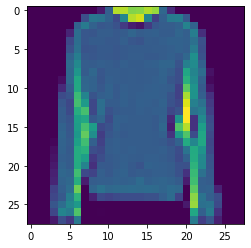

In [15]:
plt.imshow(image)

model

In [18]:
model_DENSE = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    tf.keras.layers.Flatten(),#tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])#CNN

train

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [20]:
BATCH_SIZE = 32

In [21]:
train_dataset = trainset.repeat().shuffle(metaset.splits["train"].num_examples).batch(BATCH_SIZE)

In [22]:
test_dataset = testset.batch(BATCH_SIZE)

In [23]:
model.fit(train_dataset,epochs=5,steps_per_epoch=(metaset.splits["train"].num_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3939 - accuracy: 0.8580
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2546 - accuracy: 0.9077
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2073 - accuracy: 0.9229
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1785 - accuracy: 0.9345
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1508 - accuracy: 0.9438


evaluate

In [24]:
test_loss,test_acc = model.evaluate(test_dataset)

313/313 [==============================] - 1s 3ms/step - loss: 0.2427 - accuracy: 0.9166


test

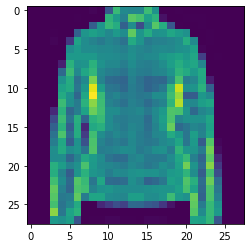

In [25]:
for image,label in test_dataset.take(1):
    (pre_for_one_batch,label_for_one_batch) = (model.predict(image.numpy()),label.numpy())
    plt.imshow(image[0].numpy().reshape((28,28)))
    break

In [26]:
np.argmax(pre_for_one_batch[0])

6

In [27]:
label

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5], dtype=int64)>